In [1]:
import pandas as pd
import seaborn as sns

In [15]:
data = pd.read_csv('C:\\Users\\Lumia520\\Desktop\\Datasets\\salaries.csv')
data

,company,job,degree,salary_more_than_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0
5,google,computer programmer,masters,1
6,abc pharma,sales executive,masters,0
7,abc pharma,computer programmer,bachelors,0
8,abc pharma,business manager,bachelors,0
9,abc pharma,business manager,masters,1


<Axes: xlabel='company', ylabel='Count'>

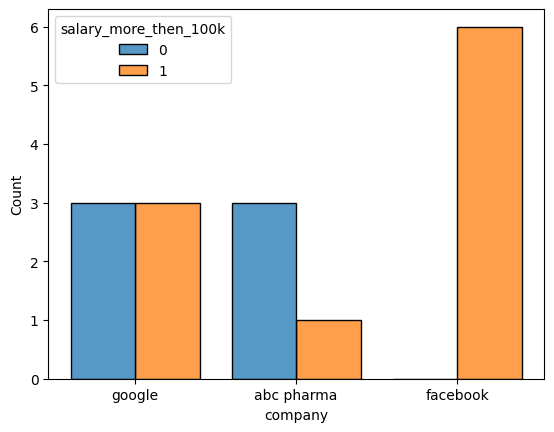

In [9]:
sns.histplot(data = data, x = 'company', hue = 'salary_more_then_100k', multiple= 'dodge', shrink = 0.8)

<Axes: xlabel='job', ylabel='Count'>

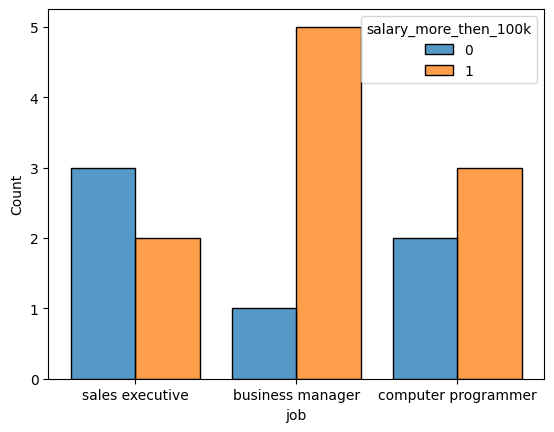

In [10]:
sns.histplot(data = data, x = 'job', hue = 'salary_more_then_100k', multiple= 'dodge', shrink = 0.8)

<Axes: xlabel='degree', ylabel='Count'>

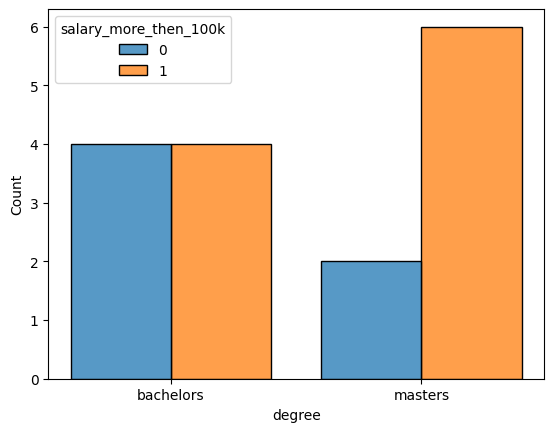

In [11]:
sns.histplot(data = data, x = 'degree', hue = 'salary_more_then_100k', multiple= 'dodge', shrink = 0.8)

In [16]:
X = data.drop('salary_more_than_100k', axis = 'columns')
X

,company,job,degree
0,google,sales executive,bachelors
1,google,sales executive,masters
2,google,business manager,bachelors
3,google,business manager,masters
4,google,computer programmer,bachelors
5,google,computer programmer,masters
6,abc pharma,sales executive,masters
7,abc pharma,computer programmer,bachelors
8,abc pharma,business manager,bachelors
9,abc pharma,business manager,masters


In [17]:
y = data.salary_more_than_100k
y

0     0
1     0
2     1
3     1
4     0
5     1
6     0
7     0
8     0
9     1
10    1
11    1
12    1
13    1
14    1
15    1
Name: salary_more_than_100k, dtype: int64

converting categorical variables into number using label encoder from sklearn

In [18]:
from sklearn.preprocessing import LabelEncoder

In [20]:
encoder = LabelEncoder()

In [21]:
X['company_n'] = encoder.fit_transform(X['company'])
X['job_n'] = encoder.fit_transform(X['job'])
X['degree_n'] = encoder.fit_transform(X['degree'])

In [22]:
X

,company,job,degree,company_n,job_n,degree_n
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1
2,google,business manager,bachelors,2,0,0
3,google,business manager,masters,2,0,1
4,google,computer programmer,bachelors,2,1,0
5,google,computer programmer,masters,2,1,1
6,abc pharma,sales executive,masters,0,2,1
7,abc pharma,computer programmer,bachelors,0,1,0
8,abc pharma,business manager,bachelors,0,0,0
9,abc pharma,business manager,masters,0,0,1


In [24]:
X = X.drop(['company', 'job', 'degree'], axis = 'columns')
X

,company_n,job_n,degree_n
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.3)

In [33]:
from sklearn import tree

In [34]:
model = tree.DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [35]:
model.score(X_test,y_test)

0.6